In [1]:
import copy
import os
import sys
import time

import jax
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from helper import df_to_latex, fig_path, set_figsize, tab_path
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# Import code from src
sys.path.insert(0, '../nqs/')
import nqs  # noqa

# Set plot and dataframe style
sns.set(context="paper", style='darkgrid', rc={"axes.facecolor": "0.96"})

fontsize = "large"
params = {"font.family": "serif",
          "font.sans-serif": ["Computer Modern"],
          "axes.labelsize": fontsize,
          "legend.fontsize": fontsize,
          "xtick.labelsize": fontsize,
          "ytick.labelsize": fontsize,
          "legend.handlelength": 2
          }

plt.rcParams.update(params)
plt.rc('text', usetex=True)

pd.set_option('display.max_columns', 50)

jax.config.update("jax_enable_x64", True)
jax.config.update('jax_platform_name', 'cpu')

In [2]:
df_0_005 = pd.read_csv("../data/training_cycles_lr_0_005.csv")
df_0_005

,energy,std_error,variance,accept_rate,sem_energy,sem_std_error,sem_variance,sem_accept_rate,nparticles,dim,eta,scale,nvisible,nhidden,mcmc_alg,nsamples,training_cycles,training_batch
0,0.558638,0.001458,0.104854,0.328665,0.000431,0.000009,0.000466,0.000396,1,1,0.005,3.0,1,2,rwm,262144,50000,5000
1,3.368869,0.007876,3.111526,0.287500,0.003209,0.000060,0.007477,0.000207,1,1,0.005,3.0,1,2,rwm,262144,100000,5000
2,0.504645,0.000452,0.008664,0.294654,0.000093,0.000002,0.000034,0.000240,1,1,0.005,3.0,1,2,rwm,262144,250000,5000
3,0.584302,0.001851,0.169860,0.357150,0.000538,0.000006,0.000384,0.000524,1,1,0.005,3.0,1,2,rwm,262144,500000,5000


In [3]:
df_0_05 = pd.read_csv("../data/training_cycles_lr_0_05.csv")
df_0_05

,energy,std_error,variance,accept_rate,sem_energy,sem_std_error,sem_variance,sem_accept_rate,nparticles,dim,eta,scale,nvisible,nhidden,mcmc_alg,nsamples,training_cycles,training_batch
0,0.500665,0.000141,0.000911,0.282055,0.000063,9.477844e-07,5.069796e-06,0.000450,1,1,0.05,3.0,1,2,rwm,262144,50000,5000
1,0.501558,0.000234,0.002395,0.286144,0.000069,1.236228e-06,1.177521e-05,0.000172,1,1,0.05,3.0,1,2,rwm,262144,100000,5000
2,0.500059,0.000077,0.000240,0.280700,0.000014,5.367503e-07,1.383364e-06,0.000261,1,1,0.05,3.0,1,2,rwm,262144,250000,5000
3,0.500003,0.000009,0.000003,0.278428,0.000002,3.961773e-08,1.600714e-08,0.000401,1,1,0.05,3.0,1,2,rwm,262144,500000,5000


In [4]:
df_0_5 = pd.read_csv("../data/training_cycles_lr_0_5.csv")
df_0_5

,energy,std_error,variance,accept_rate,sem_energy,sem_std_error,sem_variance,sem_accept_rate,nparticles,dim,eta,scale,nvisible,nhidden,mcmc_alg,nsamples,training_cycles,training_batch
0,0.586536,0.001568,0.122060,0.310815,0.000628,1.825347e-05,4.789577e-04,0.000389,1,1,0.5,3.0,1,2,rwm,262144,50000,5000
1,0.523289,0.000689,0.023353,0.279170,0.000260,3.580112e-06,8.930861e-05,0.000482,1,1,0.5,3.0,1,2,rwm,262144,100000,5000
2,0.500681,0.000110,0.000598,0.279744,0.000030,6.083985e-07,1.921086e-06,0.000138,1,1,0.5,3.0,1,2,rwm,262144,250000,5000
3,0.500010,0.000016,0.000011,0.279562,0.000007,7.325623e-08,6.777311e-08,0.000391,1,1,0.5,3.0,1,2,rwm,262144,500000,5000


In [5]:
df_lmh_0_005 = pd.read_csv("../data/training_cycles_lr_0_005_lmh.csv")
df_lmh_0_005

,energy,std_error,variance,accept_rate,sem_energy,sem_std_error,sem_variance,sem_accept_rate,nparticles,dim,eta,scale,nvisible,nhidden,mcmc_alg,nsamples,training_cycles,training_batch
0,0.506676,0.000349,0.014800,0.656314,0.000082,6.924152e-07,5.194442e-05,0.000396,1,1,0.005,1.3,1,2,lmh,262144,50000,5000
1,0.503596,0.000204,0.005612,0.613305,0.000055,5.853621e-07,7.630749e-06,0.000328,1,1,0.005,1.3,1,2,lmh,262144,100000,5000
2,0.500020,0.000047,0.000204,0.587415,0.000016,2.043040e-07,5.169107e-07,0.000329,1,1,0.005,1.3,1,2,lmh,262144,250000,5000
3,0.779597,0.001627,0.520659,0.820997,0.000439,4.900138e-06,9.235346e-04,0.000380,1,1,0.005,1.3,1,2,lmh,262144,500000,5000


In [6]:
df_lmh_0_05 = pd.read_csv("../data/training_cycles_lr_0_05_lmh.csv")
df_lmh_0_05

,energy,std_error,variance,accept_rate,sem_energy,sem_std_error,sem_variance,sem_accept_rate,nparticles,dim,eta,scale,nvisible,nhidden,mcmc_alg,nsamples,training_cycles,training_batch
0,0.500071,0.000034,0.000143,0.584191,0.000013,8.525491e-08,3.044303e-07,0.000333,1,1,0.05,1.3,1,2,lmh,262144,50000,5000
1,0.500178,0.000039,0.000232,0.582942,0.000009,8.204321e-08,2.919379e-07,0.000295,1,1,0.05,1.3,1,2,lmh,262144,100000,5000
2,0.502810,0.000224,0.005768,0.623691,0.000080,5.068589e-07,1.607482e-05,0.000308,1,1,0.05,1.3,1,2,lmh,262144,250000,5000
3,0.500066,0.000066,0.000414,0.591148,0.000020,2.122465e-07,1.478927e-06,0.000416,1,1,0.05,1.3,1,2,lmh,262144,500000,5000


In [7]:
df_lmh_0_5 = pd.read_csv("../data/training_cycles_lr_0_5_lmh.csv")
df_lmh_0_5

,energy,std_error,variance,accept_rate,sem_energy,sem_std_error,sem_variance,sem_accept_rate,nparticles,dim,eta,scale,nvisible,nhidden,mcmc_alg,nsamples,training_cycles,training_batch
0,0.506669,0.000188,0.006647,0.579792,0.000080,6.395029e-07,7.559443e-06,0.000429,1,1,0.5,1.3,1,2,lmh,262144,50000,5000
1,0.515544,0.000390,0.023027,0.642752,0.000156,1.518789e-06,5.571098e-05,0.000425,1,1,0.5,1.3,1,2,lmh,262144,100000,5000
2,0.500172,0.000031,0.000172,0.581049,0.000012,1.732245e-07,1.861995e-07,0.000364,1,1,0.5,1.3,1,2,lmh,262144,250000,5000
3,0.500051,0.000050,0.000275,0.587724,0.000016,1.850737e-07,1.233625e-06,0.000358,1,1,0.5,1.3,1,2,lmh,262144,500000,5000


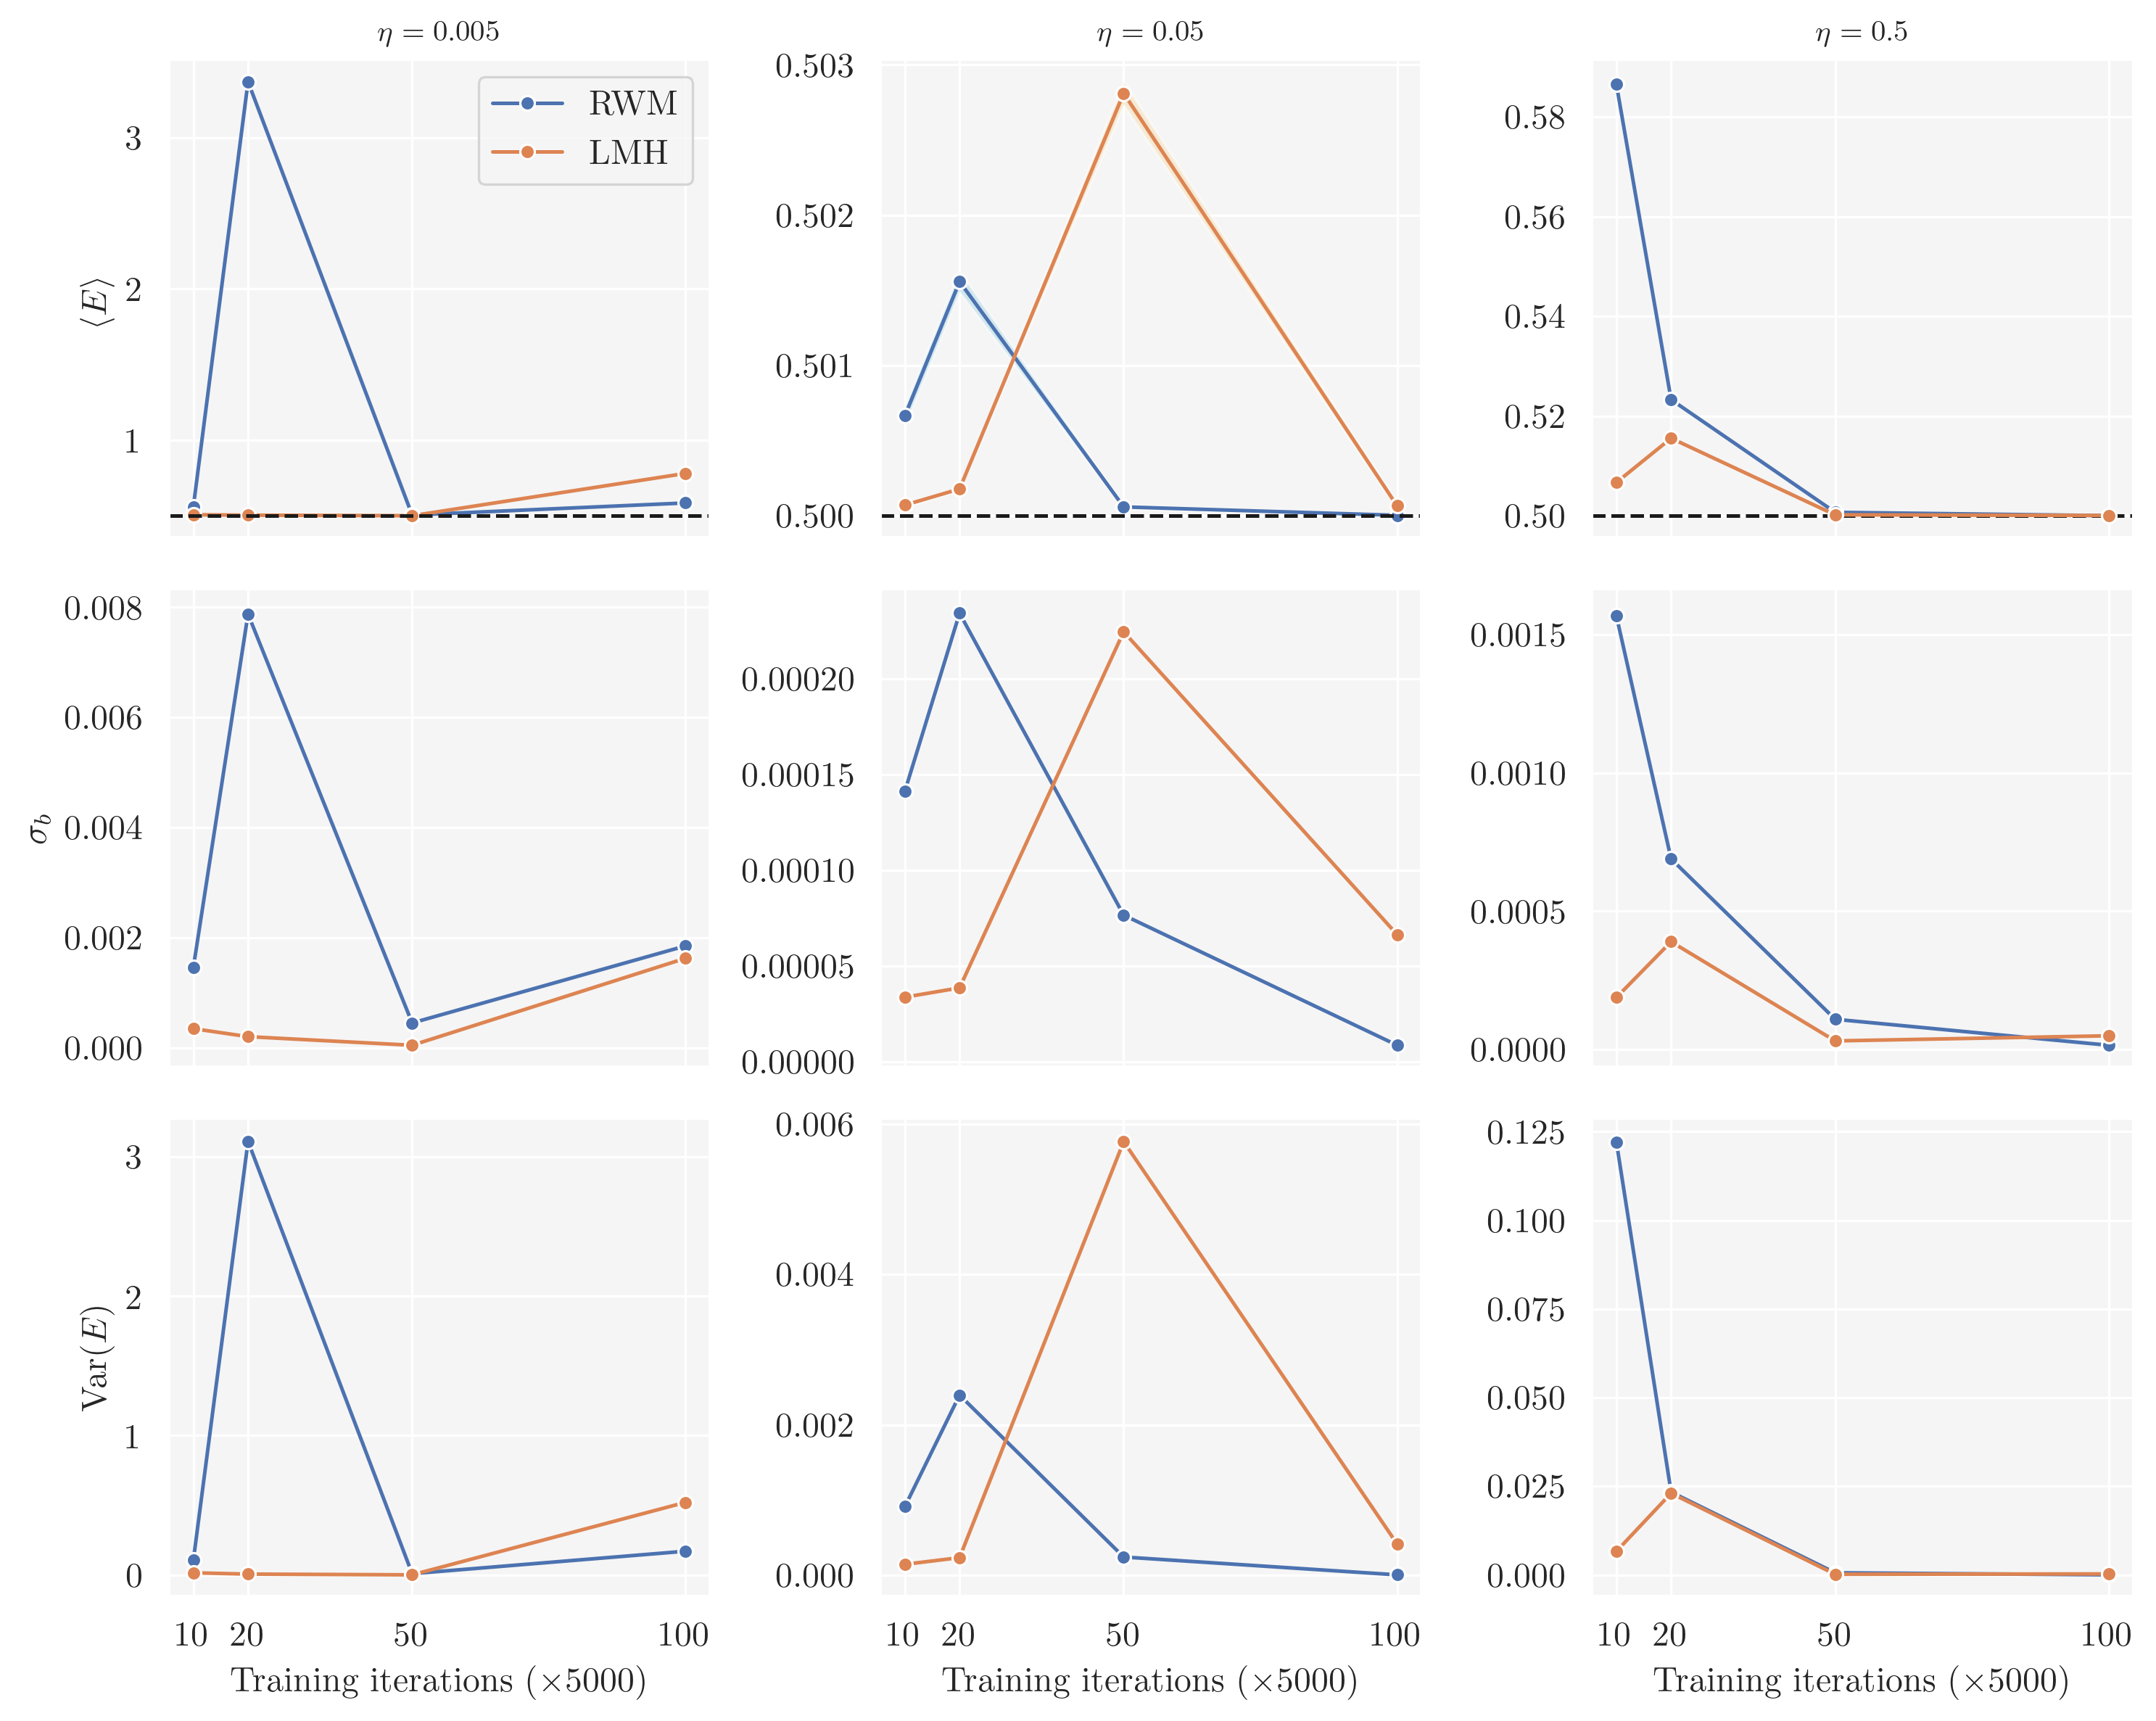

In [23]:
fig, axes = plt.subplots(nrows=3, 
                         ncols=3, 
                         figsize=(10, 8), 
                         tight_layout=True,
                         sharex='col', #True,
                         #sharey='row', #True,
                         dpi=150
                        )

## Energy

# eta = 0.005
sns.lineplot(data=df_0_005, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             label='RWM',
             ax=axes[0, 0]
            )
axes[0, 0].fill_between(df_0_005["training_cycles"],
                        df_0_005["energy"] - df_0_005["sem_energy"], 
                        df_0_005["energy"] + df_0_005["sem_energy"],
                        alpha=0.5,
                        facecolor='lightblue')

# lmh
sns.lineplot(data=df_lmh_0_005, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             color='C1',
             label='LMH',
             ax=axes[0, 0]
            )
axes[0, 0].fill_between(df_lmh_0_005["training_cycles"],
                        df_lmh_0_005["energy"] - df_lmh_0_005["sem_energy"], 
                        df_lmh_0_005["energy"] + df_lmh_0_005["sem_energy"],
                        alpha=0.5,
                        facecolor='wheat')



axes[0, 0].set(ylabel=r'$\langle E \rangle$', title=r'$\eta=0.005$')
axes[0, 0].axhline(0.5, ls='--', color='k', label='Ground truth')

#axes[0, 0].legend()

# eta = 0.05
sns.lineplot(data=df_0_05, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             ax=axes[0, 1]
            )
axes[0, 1].axhline(0.5, ls='--', color='k')
axes[0, 1].fill_between(df_0_05["training_cycles"],
                        df_0_05["energy"] - df_0_05["sem_energy"], 
                        df_0_05["energy"] + df_0_05["sem_energy"],
                        alpha=0.5,
                        facecolor='lightblue')

# lmh
sns.lineplot(data=df_lmh_0_05, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             color='C1',
             ax=axes[0, 1]
            )
axes[0, 1].fill_between(df_lmh_0_05["training_cycles"],
                        df_lmh_0_05["energy"] - df_lmh_0_05["sem_energy"], 
                        df_lmh_0_05["energy"] + df_lmh_0_05["sem_energy"],
                        alpha=0.5,
                        facecolor='wheat')

axes[0, 1].set(title=r'$\eta=0.05$', ylabel='')

# eta = 0.5
sns.lineplot(data=df_0_5, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             ax=axes[0, 2]
            )
axes[0, 2].axhline(0.5, ls='--', color='k')
axes[0, 2].fill_between(df_0_5["training_cycles"],
                        df_0_5["energy"] - df_0_5["sem_energy"], 
                        df_0_5["energy"] + df_0_5["sem_energy"],
                        alpha=0.5,
                        facecolor='lightblue')

# lmh
sns.lineplot(data=df_lmh_0_5, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             color='C1',
             ax=axes[0, 2]
            )
axes[0, 2].fill_between(df_lmh_0_5["training_cycles"],
                        df_lmh_0_5["energy"] - df_lmh_0_5["sem_energy"], 
                        df_lmh_0_5["energy"] + df_lmh_0_5["sem_energy"],
                        alpha=0.5,
                        facecolor='wheat')

axes[0, 2].set(title=r'$\eta=0.5$', ylabel='')



## Sampling error

# eta = 0.005
sns.lineplot(data=df_0_005, 
             x="training_cycles", 
             y="std_error", 
             marker="o",
             ax=axes[1, 0]
            )
axes[1, 0].fill_between(df_0_005["training_cycles"],
                        df_0_005["std_error"] - df_0_005["sem_std_error"], 
                        df_0_005["std_error"] + df_0_005["sem_std_error"], 
                        alpha=0.5,
                        facecolor='lightblue')

# lmh
sns.lineplot(data=df_lmh_0_005, 
             x="training_cycles", 
             y="std_error", 
             marker="o",
             color='C1',
             ax=axes[1, 0]
            )
axes[1, 0].fill_between(df_lmh_0_005["training_cycles"],
                        df_lmh_0_005["std_error"] - df_lmh_0_005["sem_std_error"], 
                        df_lmh_0_005["std_error"] + df_lmh_0_005["sem_std_error"], 
                        alpha=0.5,
                        facecolor='wheat')

axes[1, 0].set(ylabel=r'$\sigma_b$')

# eta = 0.05
sns.lineplot(data=df_0_05, 
             x="training_cycles", 
             y="std_error", 
             marker="o",
             ax=axes[1, 1]
            )
axes[1, 1].fill_between(df_0_05["training_cycles"],
                        df_0_05["std_error"] - df_0_05["sem_std_error"], 
                        df_0_05["std_error"] + df_0_05["sem_std_error"], 
                        alpha=0.5,
                        facecolor='lightblue')

sns.lineplot(data=df_lmh_0_05, 
             x="training_cycles", 
             y="std_error", 
             marker="o",
             color='C1',
             ax=axes[1, 1]
            )
axes[1, 1].fill_between(df_lmh_0_05["training_cycles"],
                        df_lmh_0_05["std_error"] - df_lmh_0_05["sem_std_error"], 
                        df_lmh_0_05["std_error"] + df_lmh_0_05["sem_std_error"], 
                        alpha=0.5,
                        facecolor='wheat')
axes[1, 1].set(ylabel='')
# eta = 0.5
sns.lineplot(data=df_0_5, 
             x="training_cycles", 
             y="std_error", 
             marker="o",
             ax=axes[1, 2]
            )
axes[1, 2].fill_between(df_0_5["training_cycles"],
                        df_0_5["std_error"] - df_0_5["sem_std_error"], 
                        df_0_5["std_error"] + df_0_5["sem_std_error"], 
                        alpha=0.5,
                        facecolor='lightblue')

sns.lineplot(data=df_lmh_0_5, 
             x="training_cycles", 
             y="std_error", 
             marker="o",
             color='C1',
             ax=axes[1, 2]
            )
axes[1, 2].fill_between(df_lmh_0_5["training_cycles"],
                        df_lmh_0_5["std_error"] - df_lmh_0_5["sem_std_error"], 
                        df_lmh_0_5["std_error"] + df_lmh_0_5["sem_std_error"], 
                        alpha=0.5,
                        facecolor='wheat')

axes[1, 2].set(ylabel='')
## Variance

# eta = 0.005
sns.lineplot(data=df_0_005, 
             x="training_cycles", 
             y="variance",
             marker="o",
             ax=axes[2, 0]
            )
axes[2, 0].fill_between(df_0_005["training_cycles"],
                        df_0_005["variance"] - df_0_005["sem_variance"], 
                        df_0_005["variance"] + df_0_005["sem_variance"], 
                        alpha=0.5,
                        facecolor='lightblue')

# lmh 
sns.lineplot(data=df_lmh_0_005, 
             x="training_cycles", 
             y="variance",
             marker="o",
             color='C1',
             ax=axes[2, 0]
            )
axes[2, 0].fill_between(df_lmh_0_005["training_cycles"],
                        df_lmh_0_005["variance"] - df_lmh_0_005["sem_variance"], 
                        df_lmh_0_005["variance"] + df_lmh_0_005["sem_variance"], 
                        alpha=0.5,
                        facecolor='wheat')

axes[2, 0].set(ylabel=r'$\mathrm{Var}(E)$', 
               xlabel=r'Training iterations ($\times 5000$)', 
               xticks=[50_000, 100_000, 250_000, 500_000],
               xticklabels=[10, 20, 50, 100]
              )

# eta = 0.05
sns.lineplot(data=df_0_05, 
             x="training_cycles", 
             y="variance",
             marker="o",
             ax=axes[2, 1]
            )
axes[2, 1].fill_between(df_0_05["training_cycles"],
                        df_0_05["variance"] - df_0_05["sem_variance"], 
                        df_0_05["variance"] + df_0_05["sem_variance"], 
                        alpha=0.5,
                        facecolor='lightblue')

# lmh
sns.lineplot(data=df_lmh_0_05, 
             x="training_cycles", 
             y="variance",
             marker="o",
             color='C1',
             ax=axes[2, 1]
            )
axes[2, 1].fill_between(df_lmh_0_05["training_cycles"],
                        df_lmh_0_05["variance"] - df_lmh_0_05["sem_variance"], 
                        df_lmh_0_05["variance"] + df_lmh_0_05["sem_variance"], 
                        alpha=0.5,
                        facecolor='wheat')

axes[2, 1].set(xlabel=r'Training iterations ($\times 5000$)',
               ylabel='',
               xticks=[50_000, 100_000, 250_000, 500_000],
               xticklabels=[10, 20, 50, 100]
              )

# eta = 0.5
sns.lineplot(data=df_0_5, 
             x="training_cycles", 
             y="variance",
             marker="o",
             ax=axes[2, 2]
            )
axes[2, 2].fill_between(df_0_5["training_cycles"],
                        df_0_5["variance"] - df_0_5["sem_variance"], 
                        df_0_5["variance"] + df_0_5["sem_variance"], 
                        alpha=0.5,
                        facecolor='lightblue')

sns.lineplot(data=df_lmh_0_5, 
             x="training_cycles", 
             y="variance",
             marker="o",
             color='C1',
             ax=axes[2, 2]
            )
axes[2, 2].fill_between(df_lmh_0_5["training_cycles"],
                        df_lmh_0_5["variance"] - df_lmh_0_5["sem_variance"], 
                        df_lmh_0_5["variance"] + df_lmh_0_5["sem_variance"], 
                        alpha=0.5,
                        facecolor='wheat')

axes[2, 2].set(xlabel=r'Training iterations ($\times 5000$)', 
               ylabel='',
               xticks=[50_000, 100_000, 250_000, 500_000],
               xticklabels=[10, 20, 50, 100]
              )

# Save figure
fig.savefig(fig_path("training_cycles_lr.pdf"), bbox_inches='tight')

We vary the number of training iterations and the the learning rate, $\eta$. The training, or update of parameters, are done in batches of 5000 iterations, meaning that the x-axis tick labels correspond to the number of updates. 

Each point is the average of 8 Markov chains, each with expectation value of the energy, $\langle E \rangle$, the variance $\mathrm{Var}(E)$ and sampling error, $\sigma_b$, found via the blocking method, estimated from $2^{18}$ samples. The scales of the proposal distributions, $\sigma_p$, are set to $\sigma_p=3.0$ and $\sigma_p=1.3$ for the RWM and LMH algorithms, respectively, which give acceptance rates of $\sim 30\%$ and $\sim60\%$, respectively. 

System: 1 particle in 1 dimension, 2 hidden neurons, with the variance in the Gaussian layer set as $\sigma_\mathrm{RBM}^2=1.0$

### Batch size 1000

In [10]:
df_0_005_b1k = pd.read_csv("../data/training_cycles_lr_0_005_b1000.csv")
df_0_005_b1k

,energy,std_error,variance,accept_rate,sem_energy,sem_std_error,sem_variance,sem_accept_rate,nparticles,dim,eta,scale,nvisible,nhidden,mcmc_alg,nsamples,training_cycles,training_batch
0,0.500004,0.000009,0.000004,0.278613,0.000003,4.671270e-08,1.453550e-08,0.000462,1,1,0.005,3.0,1,2,rwm,262144,50000,1000
1,0.509491,0.000653,0.018713,0.303045,0.000156,5.681194e-06,1.092274e-04,0.000196,1,1,0.005,3.0,1,2,rwm,262144,100000,1000
2,0.534654,0.001212,0.068177,0.326463,0.000438,6.817621e-06,2.741042e-04,0.000410,1,1,0.005,3.0,1,2,rwm,262144,250000,1000
3,0.500010,0.000026,0.000027,0.279666,0.000007,1.436159e-07,1.195706e-07,0.000303,1,1,0.005,3.0,1,2,rwm,262144,500000,1000


In [11]:
df_0_05_b1k = pd.read_csv("../data/training_cycles_lr_0_05_b1000.csv")
df_0_05_b1k

,energy,std_error,variance,accept_rate,sem_energy,sem_std_error,sem_variance,sem_accept_rate,nparticles,dim,eta,scale,nvisible,nhidden,mcmc_alg,nsamples,training_cycles,training_batch
0,0.500001,0.000004,7.634943e-07,0.278623,0.000001,2.119180e-08,4.678264e-09,0.000471,1,1,0.05,3.0,1,2,rwm,262144,50000,1000
1,0.500069,0.000080,2.675134e-04,0.281235,0.000025,4.308538e-07,9.949987e-07,0.000358,1,1,0.05,3.0,1,2,rwm,262144,100000,1000
2,0.500045,0.000063,1.639193e-04,0.280887,0.000019,3.537195e-07,8.723873e-07,0.000298,1,1,0.05,3.0,1,2,rwm,262144,250000,1000
3,0.500039,0.000056,1.291660e-04,0.280411,0.000021,4.698541e-07,7.710844e-07,0.000229,1,1,0.05,3.0,1,2,rwm,262144,500000,1000


In [12]:
df_0_5_b1k = pd.read_csv("../data/training_cycles_lr_0_5_b1000.csv")
df_0_5_b1k

,energy,std_error,variance,accept_rate,sem_energy,sem_std_error,sem_variance,sem_accept_rate,nparticles,dim,eta,scale,nvisible,nhidden,mcmc_alg,nsamples,training_cycles,training_batch
0,0.500600,0.000160,0.001166,0.283692,0.000054,2.991082e-06,3.094741e-05,0.000279,1,1,0.5,3.0,1,2,rwm,262144,50000,1000
1,0.500010,0.000018,0.000013,0.279263,0.000006,1.858957e-07,8.315774e-08,0.000438,1,1,0.5,3.0,1,2,rwm,262144,100000,1000
2,0.500000,0.000010,0.000004,0.278645,0.000004,5.657452e-08,3.217841e-08,0.000355,1,1,0.5,3.0,1,2,rwm,262144,250000,1000
3,0.499999,0.000005,0.000001,0.278441,0.000002,3.852246e-08,7.460183e-09,0.000465,1,1,0.5,3.0,1,2,rwm,262144,500000,1000


In [16]:
df_lmh_0_005_b1k = pd.read_csv("../data/training_cycles_lr_0_005_b1000_lmh.csv")
df_lmh_0_005_b1k

,energy,std_error,variance,accept_rate,sem_energy,sem_std_error,sem_variance,sem_accept_rate,nparticles,dim,eta,scale,nvisible,nhidden,mcmc_alg,nsamples,training_cycles,training_batch
0,1.035586,0.002056,0.820124,0.764198,0.000905,1.197147e-05,0.000976,0.000280,1,1,0.005,1.3,1,2,lmh,262144,50000,1000
1,0.502150,0.000225,0.005481,0.626723,0.000097,8.107145e-07,0.000013,0.000309,1,1,0.005,1.3,1,2,lmh,262144,100000,1000
2,0.502646,0.000241,0.006458,0.629844,0.000115,1.404515e-06,0.000036,0.000350,1,1,0.005,1.3,1,2,lmh,262144,250000,1000
3,0.513295,0.000468,0.028573,0.684316,0.000156,2.749560e-06,0.000076,0.000257,1,1,0.005,1.3,1,2,lmh,262144,500000,1000


In [17]:
df_lmh_0_05_b1k = pd.read_csv("../data/training_cycles_lr_0_05_b1000_lmh.csv")
df_lmh_0_05_b1k

,energy,std_error,variance,accept_rate,sem_energy,sem_std_error,sem_variance,sem_accept_rate,nparticles,dim,eta,scale,nvisible,nhidden,mcmc_alg,nsamples,training_cycles,training_batch
0,0.500000,0.000005,0.000004,0.578363,0.000002,2.142106e-08,9.199601e-09,0.000377,1,1,0.05,1.3,1,2,lmh,262144,50000,1000
1,0.500026,0.000050,0.000231,0.588423,0.000022,1.898024e-07,7.578332e-07,0.000364,1,1,0.05,1.3,1,2,lmh,262144,100000,1000
2,0.500262,0.000097,0.000905,0.597698,0.000017,2.796848e-07,1.521476e-06,0.000312,1,1,0.05,1.3,1,2,lmh,262144,250000,1000
3,0.499995,0.000009,0.000007,0.580024,0.000002,3.910990e-08,2.588997e-08,0.000469,1,1,0.05,1.3,1,2,lmh,262144,500000,1000


In [18]:
df_lmh_0_5_b1k = pd.read_csv("../data/training_cycles_lr_0_5_b1000_lmh.csv")
df_lmh_0_5_b1k

,energy,std_error,variance,accept_rate,sem_energy,sem_std_error,sem_variance,sem_accept_rate,nparticles,dim,eta,scale,nvisible,nhidden,mcmc_alg,nsamples,training_cycles,training_batch
0,0.500247,0.000035,2.338287e-04,0.578686,1.130310e-05,1.421934e-07,3.680374e-07,0.000425,1,1,0.5,1.3,1,2,lmh,262144,50000,1000
1,0.499999,0.000002,8.984074e-07,0.578948,7.912312e-07,5.437782e-09,1.412948e-09,0.000370,1,1,0.5,1.3,1,2,lmh,262144,100000,1000
2,0.499985,0.000011,1.145861e-05,0.579662,4.334662e-06,8.647174e-08,7.126935e-08,0.000340,1,1,0.5,1.3,1,2,lmh,262144,250000,1000
3,0.499992,0.000005,2.643945e-06,0.579053,2.271490e-06,2.036004e-08,1.830892e-08,0.000397,1,1,0.5,1.3,1,2,lmh,262144,500000,1000


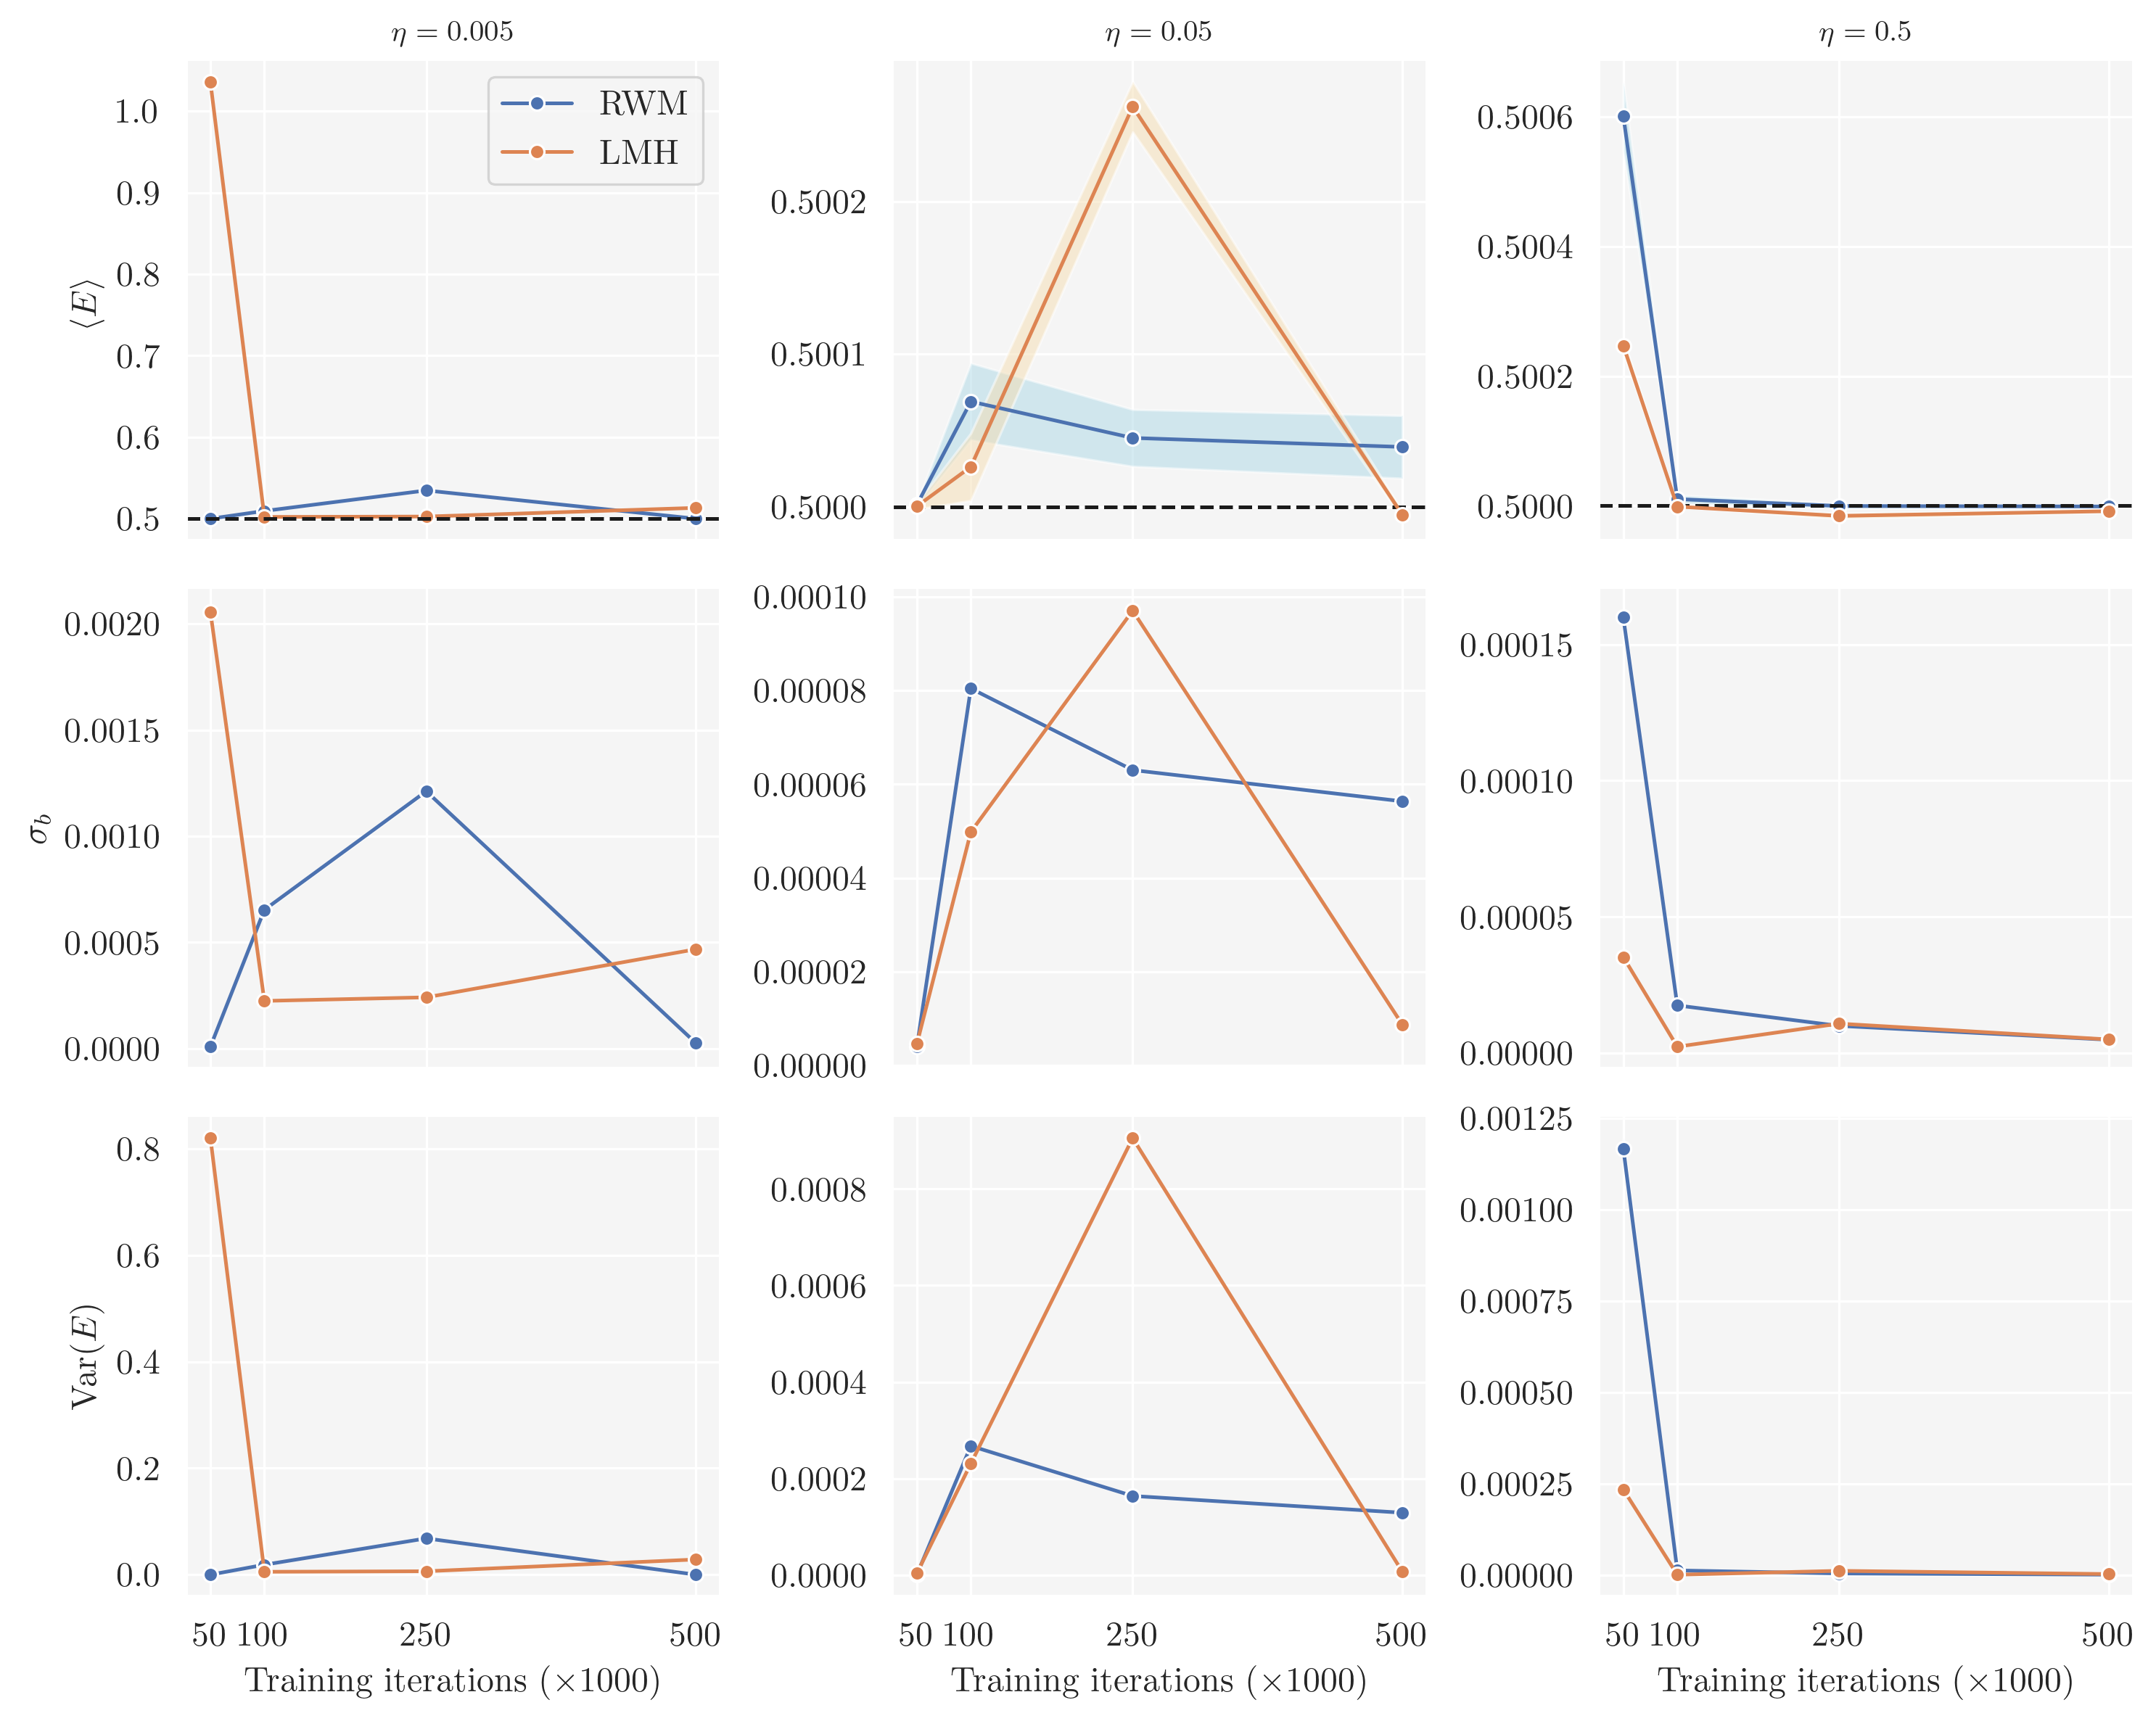

In [22]:
fig, axes = plt.subplots(nrows=3, 
                         ncols=3, 
                         figsize=(10, 8), 
                         tight_layout=True,
                         sharex='col', #True,
                         #sharey='row', #True,
                         dpi=150
                        )

## Energy

# eta = 0.005
sns.lineplot(data=df_0_005_b1k, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             label='RWM',
             ax=axes[0, 0]
            )
axes[0, 0].fill_between(df_0_005_b1k["training_cycles"],
                        df_0_005_b1k["energy"] - df_0_005_b1k["sem_energy"], 
                        df_0_005_b1k["energy"] + df_0_005_b1k["sem_energy"],
                        alpha=0.5,
                        facecolor='lightblue')

# lmh
sns.lineplot(data=df_lmh_0_005_b1k, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             color='C1',
             label='LMH',
             ax=axes[0, 0]
            )
axes[0, 0].fill_between(df_lmh_0_005_b1k["training_cycles"],
                        df_lmh_0_005_b1k["energy"] - df_lmh_0_005_b1k["sem_energy"], 
                        df_lmh_0_005_b1k["energy"] + df_lmh_0_005_b1k["sem_energy"],
                        alpha=0.5,
                        facecolor='wheat')



axes[0, 0].set(ylabel=r'$\langle E \rangle$', title=r'$\eta=0.005$')
axes[0, 0].axhline(0.5, ls='--', color='k', label='Ground truth')

#axes[0, 0].legend()

# eta = 0.05
sns.lineplot(data=df_0_05_b1k, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             ax=axes[0, 1]
            )
axes[0, 1].axhline(0.5, ls='--', color='k')
axes[0, 1].fill_between(df_0_05_b1k["training_cycles"],
                        df_0_05_b1k["energy"] - df_0_05_b1k["sem_energy"], 
                        df_0_05_b1k["energy"] + df_0_05_b1k["sem_energy"],
                        alpha=0.5,
                        facecolor='lightblue')

# lmh
sns.lineplot(data=df_lmh_0_05_b1k, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             color='C1',
             ax=axes[0, 1]
            )
axes[0, 1].fill_between(df_lmh_0_05_b1k["training_cycles"],
                        df_lmh_0_05_b1k["energy"] - df_lmh_0_05_b1k["sem_energy"], 
                        df_lmh_0_05_b1k["energy"] + df_lmh_0_05_b1k["sem_energy"],
                        alpha=0.5,
                        facecolor='wheat')

axes[0, 1].set(title=r'$\eta=0.05$', ylabel='')

# eta = 0.5
sns.lineplot(data=df_0_5_b1k, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             ax=axes[0, 2]
            )
axes[0, 2].axhline(0.5, ls='--', color='k')
axes[0, 2].fill_between(df_0_5_b1k["training_cycles"],
                        df_0_5_b1k["energy"] - df_0_5_b1k["sem_energy"], 
                        df_0_5_b1k["energy"] + df_0_5_b1k["sem_energy"],
                        alpha=0.5,
                        facecolor='lightblue')

# lmh
sns.lineplot(data=df_lmh_0_5_b1k, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             color='C1',
             ax=axes[0, 2]
            )
axes[0, 2].fill_between(df_lmh_0_5_b1k["training_cycles"],
                        df_lmh_0_5_b1k["energy"] - df_lmh_0_5_b1k["sem_energy"], 
                        df_lmh_0_5_b1k["energy"] + df_lmh_0_5_b1k["sem_energy"],
                        alpha=0.5,
                        facecolor='wheat')

axes[0, 2].set(title=r'$\eta=0.5$', ylabel='')



## Sampling error

# eta = 0.005
sns.lineplot(data=df_0_005_b1k, 
             x="training_cycles", 
             y="std_error", 
             marker="o",
             ax=axes[1, 0]
            )
axes[1, 0].fill_between(df_0_005_b1k["training_cycles"],
                        df_0_005_b1k["std_error"] - df_0_005_b1k["sem_std_error"], 
                        df_0_005_b1k["std_error"] + df_0_005_b1k["sem_std_error"], 
                        alpha=0.5,
                        facecolor='lightblue')

# lmh
sns.lineplot(data=df_lmh_0_005_b1k, 
             x="training_cycles", 
             y="std_error", 
             marker="o",
             color='C1',
             ax=axes[1, 0]
            )
axes[1, 0].fill_between(df_lmh_0_005_b1k["training_cycles"],
                        df_lmh_0_005_b1k["std_error"] - df_lmh_0_005_b1k["sem_std_error"], 
                        df_lmh_0_005_b1k["std_error"] + df_lmh_0_005_b1k["sem_std_error"], 
                        alpha=0.5,
                        facecolor='wheat')

axes[1, 0].set(ylabel=r'$\sigma_b$')

# eta = 0.05
sns.lineplot(data=df_0_05_b1k, 
             x="training_cycles", 
             y="std_error", 
             marker="o",
             ax=axes[1, 1]
            )
axes[1, 1].fill_between(df_0_05_b1k["training_cycles"],
                        df_0_05_b1k["std_error"] - df_0_05_b1k["sem_std_error"], 
                        df_0_05_b1k["std_error"] + df_0_05_b1k["sem_std_error"], 
                        alpha=0.5,
                        facecolor='lightblue')

sns.lineplot(data=df_lmh_0_05_b1k, 
             x="training_cycles", 
             y="std_error", 
             marker="o",
             color='C1',
             ax=axes[1, 1]
            )
axes[1, 1].fill_between(df_lmh_0_05_b1k["training_cycles"],
                        df_lmh_0_05_b1k["std_error"] - df_lmh_0_05_b1k["sem_std_error"], 
                        df_lmh_0_05_b1k["std_error"] + df_lmh_0_05_b1k["sem_std_error"], 
                        alpha=0.5,
                        facecolor='wheat')
axes[1, 1].set(ylabel='')
# eta = 0.5
sns.lineplot(data=df_0_5_b1k, 
             x="training_cycles", 
             y="std_error", 
             marker="o",
             ax=axes[1, 2]
            )
axes[1, 2].fill_between(df_0_5_b1k["training_cycles"],
                        df_0_5_b1k["std_error"] - df_0_5_b1k["sem_std_error"], 
                        df_0_5_b1k["std_error"] + df_0_5_b1k["sem_std_error"], 
                        alpha=0.5,
                        facecolor='lightblue')

sns.lineplot(data=df_lmh_0_5_b1k, 
             x="training_cycles", 
             y="std_error", 
             marker="o",
             color='C1',
             ax=axes[1, 2]
            )
axes[1, 2].fill_between(df_lmh_0_5_b1k["training_cycles"],
                        df_lmh_0_5_b1k["std_error"] - df_lmh_0_5_b1k["sem_std_error"], 
                        df_lmh_0_5_b1k["std_error"] + df_lmh_0_5_b1k["sem_std_error"], 
                        alpha=0.5,
                        facecolor='wheat')

axes[1, 2].set(ylabel='')
## Variance

# eta = 0.005
sns.lineplot(data=df_0_005_b1k, 
             x="training_cycles", 
             y="variance",
             marker="o",
             ax=axes[2, 0]
            )
axes[2, 0].fill_between(df_0_005_b1k["training_cycles"],
                        df_0_005_b1k["variance"] - df_0_005_b1k["sem_variance"], 
                        df_0_005_b1k["variance"] + df_0_005_b1k["sem_variance"], 
                        alpha=0.5,
                        facecolor='lightblue')

# lmh 
sns.lineplot(data=df_lmh_0_005_b1k, 
             x="training_cycles", 
             y="variance",
             marker="o",
             color='C1',
             ax=axes[2, 0]
            )
axes[2, 0].fill_between(df_lmh_0_005_b1k["training_cycles"],
                        df_lmh_0_005_b1k["variance"] - df_lmh_0_005_b1k["sem_variance"], 
                        df_lmh_0_005_b1k["variance"] + df_lmh_0_005_b1k["sem_variance"], 
                        alpha=0.5,
                        facecolor='wheat')

axes[2, 0].set(ylabel=r'$\mathrm{Var}(E)$', 
               xlabel=r'Training iterations ($\times 1000$)', 
               xticks=[50_000, 100_000, 250_000, 500_000],
               xticklabels=[50, 100, 250, 500]
              )

# eta = 0.05
sns.lineplot(data=df_0_05_b1k, 
             x="training_cycles", 
             y="variance",
             marker="o",
             ax=axes[2, 1]
            )
axes[2, 1].fill_between(df_0_05_b1k["training_cycles"],
                        df_0_05_b1k["variance"] - df_0_05_b1k["sem_variance"], 
                        df_0_05_b1k["variance"] + df_0_05_b1k["sem_variance"], 
                        alpha=0.5,
                        facecolor='lightblue')

# lmh
sns.lineplot(data=df_lmh_0_05_b1k, 
             x="training_cycles", 
             y="variance",
             marker="o",
             color='C1',
             ax=axes[2, 1]
            )
axes[2, 1].fill_between(df_lmh_0_05_b1k["training_cycles"],
                        df_lmh_0_05_b1k["variance"] - df_lmh_0_05_b1k["sem_variance"], 
                        df_lmh_0_05_b1k["variance"] + df_lmh_0_05_b1k["sem_variance"], 
                        alpha=0.5,
                        facecolor='wheat')

axes[2, 1].set(xlabel=r'Training iterations ($\times 1000$)',
               ylabel='',
               xticks=[50_000, 100_000, 250_000, 500_000],
               xticklabels=[50, 100, 250, 500]
              )

# eta = 0.5
sns.lineplot(data=df_0_5_b1k, 
             x="training_cycles", 
             y="variance",
             marker="o",
             ax=axes[2, 2]
            )
axes[2, 2].fill_between(df_0_5_b1k["training_cycles"],
                        df_0_5_b1k["variance"] - df_0_5_b1k["sem_variance"], 
                        df_0_5_b1k["variance"] + df_0_5_b1k["sem_variance"], 
                        alpha=0.5,
                        facecolor='lightblue')

sns.lineplot(data=df_lmh_0_5_b1k, 
             x="training_cycles", 
             y="variance",
             marker="o",
             color='C1',
             ax=axes[2, 2]
            )
axes[2, 2].fill_between(df_lmh_0_5_b1k["training_cycles"],
                        df_lmh_0_5_b1k["variance"] - df_lmh_0_5_b1k["sem_variance"], 
                        df_lmh_0_5_b1k["variance"] + df_lmh_0_5_b1k["sem_variance"], 
                        alpha=0.5,
                        facecolor='wheat')

axes[2, 2].set(xlabel=r'Training iterations ($\times 1000$)', 
               ylabel='',
               xticks=[50_000, 100_000, 250_000, 500_000],
               xticklabels=[50, 100, 250, 500]
              )

# Save figure
fig.savefig(fig_path("training_cycles_lr_batch1000.pdf"), bbox_inches='tight')

### Playground

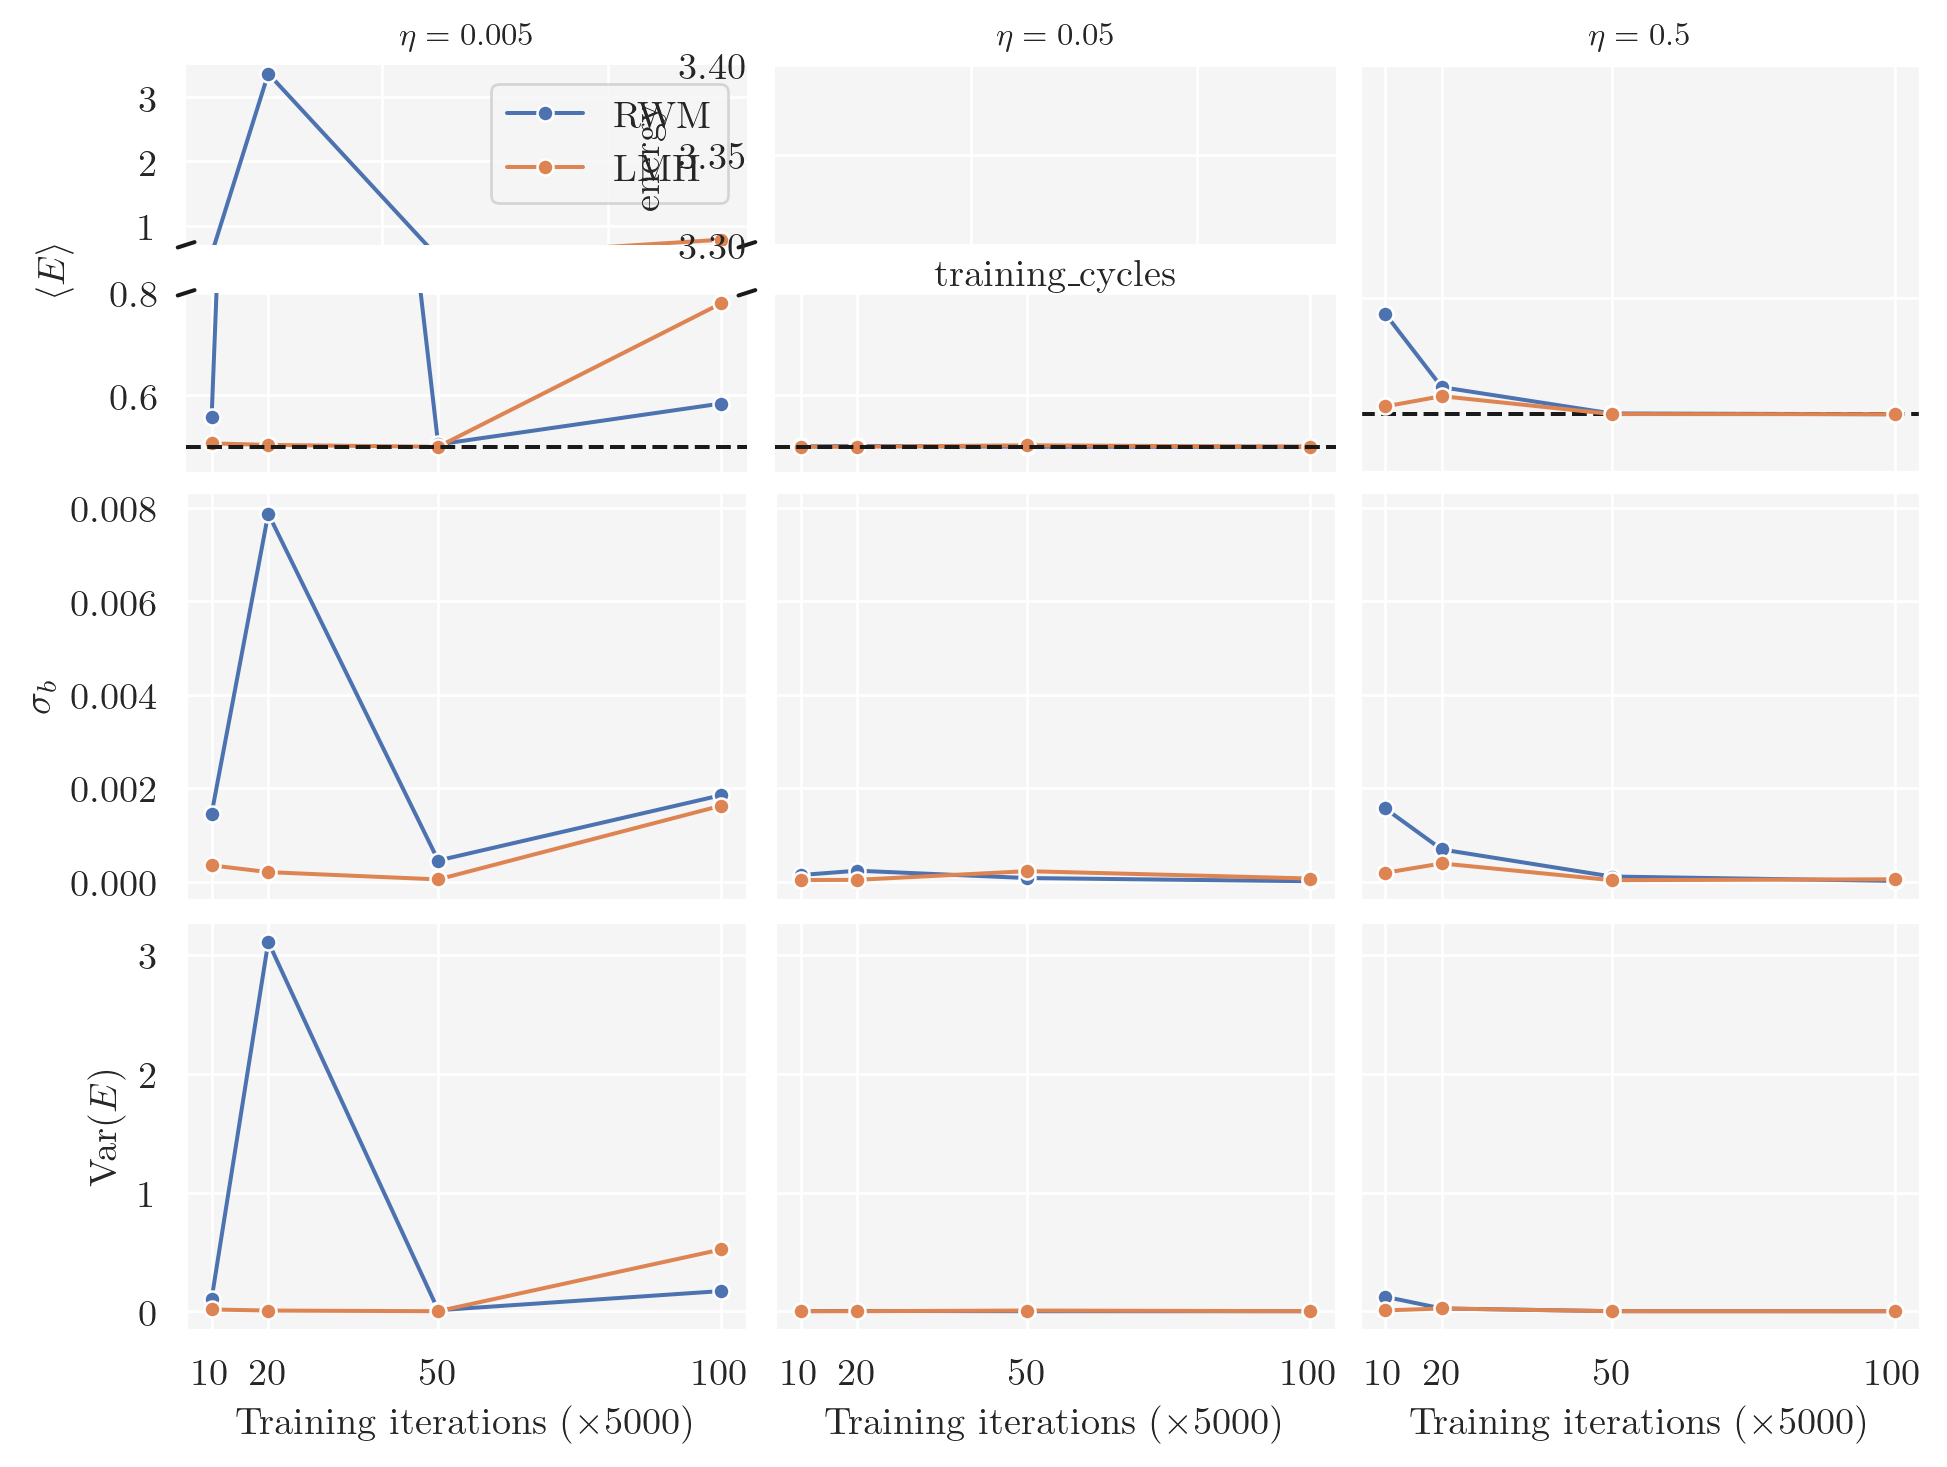

In [9]:
fig, axes = plt.subplots(nrows=3, 
                         ncols=3, 
                         figsize=(8, 6), 
                         constrained_layout=True,
                         sharex='col', #True,
                         sharey='row', #True,
                         dpi=120
                        )

## Energy

# eta = 0.005
ax00 = axes[0, 0]
divider = make_axes_locatable(ax00)
axd00 = divider.new_vertical(size="100%", pad=0.2)
fig.add_axes(axd00)

# rwm
sns.lineplot(data=df_0_005, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             ax=ax00
            )

sns.lineplot(data=df_0_005, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             label='RWM',
             ax=axd00
            )

# lmh
sns.lineplot(data=df_lmh_0_005, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             color='C1',
             ax=ax00
            )
sns.lineplot(data=df_lmh_0_005, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             color='C1',
             label='LMH',
             ax=axd00
            )

sns.despine(ax=ax00, top=True, right=True, left=True, bottom=True)
sns.despine(ax=axd00, top=True, right=True, left=True, bottom=True)

ax00.axhline(0.5, ls='--', color='k')

ax00.set_ylim(0.48, 0.52)
ax00.spines['top'].set_visible(False)
axd00.set_ylim(0.7, 3.5)
axd00.tick_params(bottom=False, labelbottom=False)
axd00.spines['bottom'].set_visible(False)

ax00.set(ylabel='', xlabel='')
axd00.set(ylabel=r'$\langle E \rangle$', title=r'$\eta=0.005$', xlabel='')
axd00.yaxis.set_label_coords(-0.2, -0.12)


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=axd00.transAxes, color='k', clip_on=False)
axd00.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
axd00.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax00.transAxes)  # switch to the bottom axes
ax00.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax00.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# eta = 0.05
ax01 = axes[0, 1]
divider = make_axes_locatable(ax01)
axd01 = divider.new_vertical(size="100%", pad=0.2)
fig.add_axes(axd01)

# rwm
sns.lineplot(data=df_0_05, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             ax=ax01
            )
sns.lineplot(data=df_0_05, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             ax=axd01
            )
ax01.axhline(0.5, ls='--', color='k')


# lmh
sns.lineplot(data=df_lmh_0_05, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             color='C1',
             ax=ax01
            )
sns.lineplot(data=df_lmh_0_05, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             color='C1',
             ax=axd01
            )

sns.despine(ax=ax01, top=True, right=True, left=True, bottom=True)
sns.despine(ax=axd01, top=True, right=True, left=True, bottom=True)

ax01.axhline(0.5, ls='--', color='k')

ax01.set_ylim(0.45, 0.8)
ax01.spines['top'].set_visible(False)
axd01.set_ylim(3.3, 3.4)
axd01.tick_params(bottom=False, labelbottom=False)
axd01.spines['bottom'].set_visible(False)

axd01.set(title=r'$\eta=0.05$')

# eta = 0.5
sns.lineplot(data=df_0_5, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             ax=axes[0, 2]
            )
axes[0, 2].axhline(0.5, ls='--', color='k')
axes[0, 2].fill_between(df_0_5["training_cycles"],
                        df_0_5["energy"] - df_0_5["sem_energy"], 
                        df_0_5["energy"] + df_0_5["sem_energy"],
                        alpha=0.5,
                        facecolor='lightblue')

# lmh
sns.lineplot(data=df_lmh_0_5, 
             x="training_cycles",  
             y="energy", 
             marker="o",
             color='C1',
             ax=axes[0, 2]
            )
axes[0, 2].fill_between(df_lmh_0_5["training_cycles"],
                        df_lmh_0_5["energy"] - df_lmh_0_5["sem_energy"], 
                        df_lmh_0_5["energy"] + df_lmh_0_5["sem_energy"],
                        alpha=0.5,
                        facecolor='wheat')

axes[0, 2].set(title=r'$\eta=0.5$')



## Sampling error

# eta = 0.005
sns.lineplot(data=df_0_005, 
             x="training_cycles", 
             y="std_error", 
             marker="o",
             ax=axes[1, 0]
            )
axes[1, 0].fill_between(df_0_005["training_cycles"],
                        df_0_005["std_error"] - df_0_005["sem_std_error"], 
                        df_0_005["std_error"] + df_0_005["sem_std_error"], 
                        alpha=0.5,
                        facecolor='lightblue')

# lmh
sns.lineplot(data=df_lmh_0_005, 
             x="training_cycles", 
             y="std_error", 
             marker="o",
             color='C1',
             ax=axes[1, 0]
            )
axes[1, 0].fill_between(df_lmh_0_005["training_cycles"],
                        df_lmh_0_005["std_error"] - df_lmh_0_005["sem_std_error"], 
                        df_lmh_0_005["std_error"] + df_lmh_0_005["sem_std_error"], 
                        alpha=0.5,
                        facecolor='wheat')

axes[1, 0].set(ylabel=r'$\sigma_b$')

# eta = 0.05
sns.lineplot(data=df_0_05, 
             x="training_cycles", 
             y="std_error", 
             marker="o",
             ax=axes[1, 1]
            )
axes[1, 1].fill_between(df_0_05["training_cycles"],
                        df_0_05["std_error"] - df_0_05["sem_std_error"], 
                        df_0_05["std_error"] + df_0_05["sem_std_error"], 
                        alpha=0.5,
                        facecolor='lightblue')

sns.lineplot(data=df_lmh_0_05, 
             x="training_cycles", 
             y="std_error", 
             marker="o",
             color='C1',
             ax=axes[1, 1]
            )
axes[1, 1].fill_between(df_lmh_0_05["training_cycles"],
                        df_lmh_0_05["std_error"] - df_lmh_0_05["sem_std_error"], 
                        df_lmh_0_05["std_error"] + df_lmh_0_05["sem_std_error"], 
                        alpha=0.5,
                        facecolor='wheat')

# eta = 0.5
sns.lineplot(data=df_0_5, 
             x="training_cycles", 
             y="std_error", 
             marker="o",
             ax=axes[1, 2]
            )
axes[1, 2].fill_between(df_0_5["training_cycles"],
                        df_0_5["std_error"] - df_0_5["sem_std_error"], 
                        df_0_5["std_error"] + df_0_5["sem_std_error"], 
                        alpha=0.5,
                        facecolor='lightblue')

sns.lineplot(data=df_lmh_0_5, 
             x="training_cycles", 
             y="std_error", 
             marker="o",
             color='C1',
             ax=axes[1, 2]
            )
axes[1, 2].fill_between(df_lmh_0_5["training_cycles"],
                        df_lmh_0_5["std_error"] - df_lmh_0_5["sem_std_error"], 
                        df_lmh_0_5["std_error"] + df_lmh_0_5["sem_std_error"], 
                        alpha=0.5,
                        facecolor='wheat')


## Variance

# eta = 0.005
sns.lineplot(data=df_0_005, 
             x="training_cycles", 
             y="variance",
             marker="o",
             ax=axes[2, 0]
            )
axes[2, 0].fill_between(df_0_005["training_cycles"],
                        df_0_005["variance"] - df_0_005["sem_variance"], 
                        df_0_005["variance"] + df_0_005["sem_variance"], 
                        alpha=0.5,
                        facecolor='lightblue')

# lmh 
sns.lineplot(data=df_lmh_0_005, 
             x="training_cycles", 
             y="variance",
             marker="o",
             color='C1',
             ax=axes[2, 0]
            )
axes[2, 0].fill_between(df_lmh_0_005["training_cycles"],
                        df_lmh_0_005["variance"] - df_lmh_0_005["sem_variance"], 
                        df_lmh_0_005["variance"] + df_lmh_0_005["sem_variance"], 
                        alpha=0.5,
                        facecolor='wheat')

axes[2, 0].set(ylabel=r'$\mathrm{Var}(E)$', 
               xlabel=r'Training iterations ($\times 5000$)', 
               xticks=[50_000, 100_000, 250_000, 500_000],
               xticklabels=[10, 20, 50, 100]
              )

# eta = 0.05
sns.lineplot(data=df_0_05, 
             x="training_cycles", 
             y="variance",
             marker="o",
             ax=axes[2, 1]
            )
axes[2, 1].fill_between(df_0_05["training_cycles"],
                        df_0_05["variance"] - df_0_05["sem_variance"], 
                        df_0_05["variance"] + df_0_05["sem_variance"], 
                        alpha=0.5,
                        facecolor='lightblue')

# lmh
sns.lineplot(data=df_lmh_0_05, 
             x="training_cycles", 
             y="variance",
             marker="o",
             color='C1',
             ax=axes[2, 1]
            )
axes[2, 1].fill_between(df_lmh_0_05["training_cycles"],
                        df_lmh_0_05["variance"] - df_lmh_0_05["sem_variance"], 
                        df_lmh_0_05["variance"] + df_lmh_0_05["sem_variance"], 
                        alpha=0.5,
                        facecolor='wheat')

axes[2, 1].set(xlabel=r'Training iterations ($\times 5000$)', 
               xticks=[50_000, 100_000, 250_000, 500_000],
               xticklabels=[10, 20, 50, 100]
              )

# eta = 0.5
sns.lineplot(data=df_0_5, 
             x="training_cycles", 
             y="variance",
             marker="o",
             ax=axes[2, 2]
            )
axes[2, 2].fill_between(df_0_5["training_cycles"],
                        df_0_5["variance"] - df_0_5["sem_variance"], 
                        df_0_5["variance"] + df_0_5["sem_variance"], 
                        alpha=0.5,
                        facecolor='lightblue')

sns.lineplot(data=df_lmh_0_5, 
             x="training_cycles", 
             y="variance",
             marker="o",
             color='C1',
             ax=axes[2, 2]
            )
axes[2, 2].fill_between(df_lmh_0_5["training_cycles"],
                        df_lmh_0_5["variance"] - df_lmh_0_5["sem_variance"], 
                        df_lmh_0_5["variance"] + df_lmh_0_5["sem_variance"], 
                        alpha=0.5,
                        facecolor='wheat')

axes[2, 2].set(xlabel=r'Training iterations ($\times 5000$)', 
               xticks=[50_000, 100_000, 250_000, 500_000],
               xticklabels=[10, 20, 50, 100]
              )

# Save figure
plt.show()